In [1]:
import pandas as pd
import numpy as np

In [2]:
star_wars=pd.read_csv('star_wars.csv',encoding='ISO-8859-1')

In [3]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

In [5]:
star_wars=star_wars[pd.notnull(star_wars['RespondentID'])]

In [6]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1186 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            836 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              673 non-null object
Unnamed: 4                                                                                                                                       571 non-null object
Unnamed: 5                                                       

In [7]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [9]:
for col in ['Have you seen any of the 6 films in the Star Wars franchise?',
'Do you consider yourself to be a fan of the Star Wars film franchise?']:
    star_wars[col]=star_wars[col].map({'Yes':True,'No':False})

In [10]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [11]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [12]:
movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [13]:
star_wars=star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
                                  'Unnamed: 4':'seen_2',
                                  'Unnamed: 5':'seen_3',
                                  'Unnamed: 6':'seen_4',
                                  'Unnamed: 7':'seen_5',
                                  'Unnamed: 8':'seen_6'
                                 })

In [14]:
star_wars.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

In [15]:
star_wars.iloc[:,9:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 6 columns):
Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.    835 non-null object
Unnamed: 10                                                                                                                                      836 non-null object
Unnamed: 11                                                                                                                                      835 non-null object
Unnamed: 12                                                                                                                                      836 non-null object
Unnamed: 13                                                                                                                                      836 non-null object
Unnamed: 14                                                          

In [16]:
star_wars=star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
    'Unnamed: 10':'ranking_2',
    'Unnamed: 11':'ranking_3',
    'Unnamed: 12':'ranking_4',
    'Unnamed: 13':'ranking_5',
    'Unnamed: 14':'ranking_6'
})

In [17]:
star_wars[star_wars.columns[9:15]]

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3
6,1,4,3,6,5,2
7,6,5,4,3,1,2
8,4,5,6,3,2,1
9,5,4,6,2,1,3
10,1,2,3,4,5,6


In [18]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)


In [19]:
star_wars.iloc[:,9:15].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

In [20]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

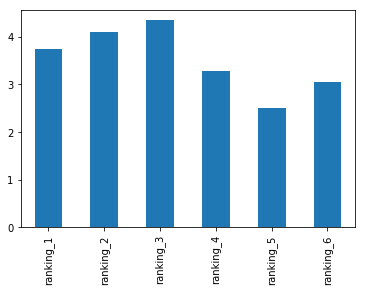

In [22]:
star_wars[star_wars.columns[9:15]].mean().plot.bar()

## Rankings
So far, we've cleaned up the data, renamed several columns, and computed the average ranking of each movie. As I suspected, it looks like the "original" movies are rated much more highly than the newer ones.
_____

In [23]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

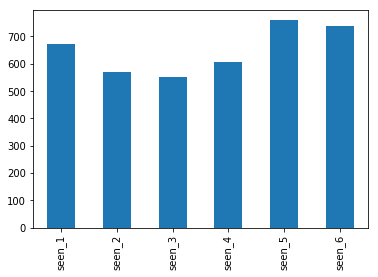

In [24]:
star_wars[star_wars.columns[3:9]].sum().plot.bar()

## View counts
It appears that the original movies were seen by more respondents than the newer movies. This reinforces what we saw in the rankings, where the earlier movies seem to be more popular.
_____

In [25]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

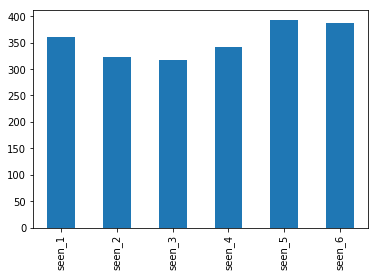

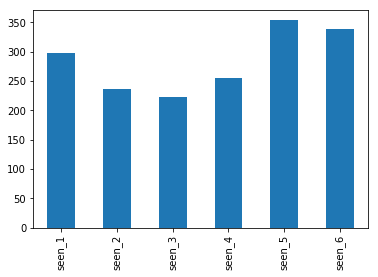

In [26]:
males[males.columns[3:9]].sum().plot.bar()
plt.show()

females[females.columns[3:9]].sum().plot.bar()
plt.show()

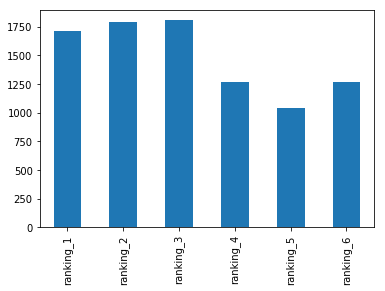

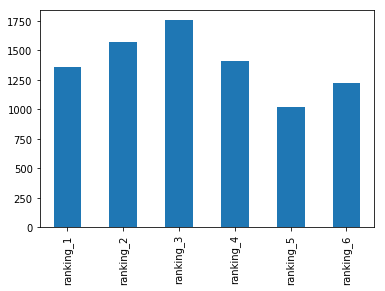

In [27]:
males[males.columns[9:15]].sum().plot.bar()
plt.show()

females[females.columns[9:15]].sum().plot.bar()
plt.show()

## Male/Female differences in favorite Star Wars movie and most seen movie

Interestingly, more males watches episodes 1-3, but males liked them far less than females did.
_____

## Education differences in favorite Star Wars movie and most seen movie



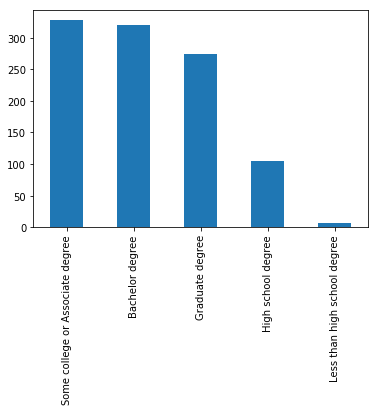

In [28]:
star_wars['Education'].value_counts().plot.bar()

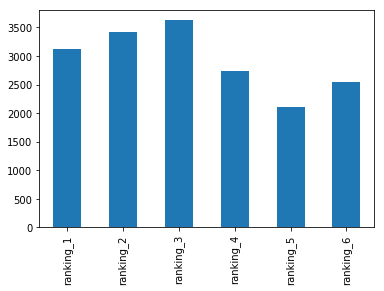

In [35]:
star_wars[star_wars[star_wars['Education']=='Bachelor degree'].columns[9:15]].sum().plot.bar()

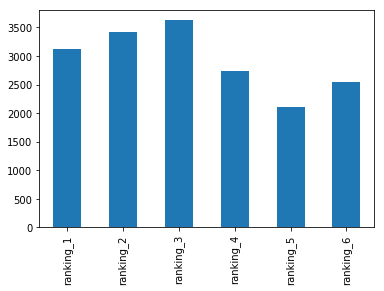

In [34]:
star_wars[star_wars[star_wars['Education']=='Some college or Associate degree'].columns[9:15]].sum().plot.bar()